In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4349,ham,Yes. Rent is very expensive so its the way we ...,NaN,NaN,NaN
3911,spam,You have an important customer service announc...,NaN,NaN,NaN
5296,ham,Are u coming to the funeral home,NaN,NaN,NaN
3212,ham,What's ur pin?,NaN,NaN,NaN
5174,ham,Water logging in desert. Geoenvironmental impl...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
3613,ham,Ok c Ì_ then.
3888,ham,Unlimited texts. Limited minutes.
2230,ham,Hey... Thk we juz go accordin to wat we discus...
2627,ham,I know I'm lacking on most of this particular ...
4889,ham,Sounds like there could be a lot of time spent...


In [9]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
13,ham,I've been searching for the right words to tha...
4784,spam,Urgent -call 09066649731from Landline. Your co...
641,ham,"said kiss, kiss, i can't do the sound effects..."
4346,spam,U 447801259231 have a secret admirer who is lo...
3719,ham,"Yeah why not, is the gang all ready"


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

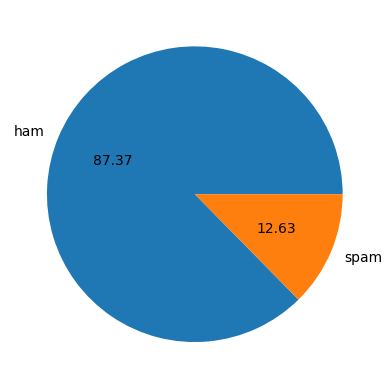

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_chars'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['nums_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
  df['nums_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.sample(5)

,target,text,num_chars,nums_words,nums_sentences
5032,0,* Was really good to see you the other day dud...,69,16,1
2338,0,"Alright, see you in a bit",25,7,1
2436,0,Btw regarding that we should really try to see...,114,24,1
505,0,No it's waiting in e car dat's bored wat. Cos ...,117,31,3
3563,0,Do you always celebrate NY's with your family ?,47,10,1


In [29]:
df.describe()

,target,num_chars,nums_words,nums_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0].describe()

,target,num_chars,nums_words,nums_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1].describe()

,target,num_chars,nums_words,nums_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

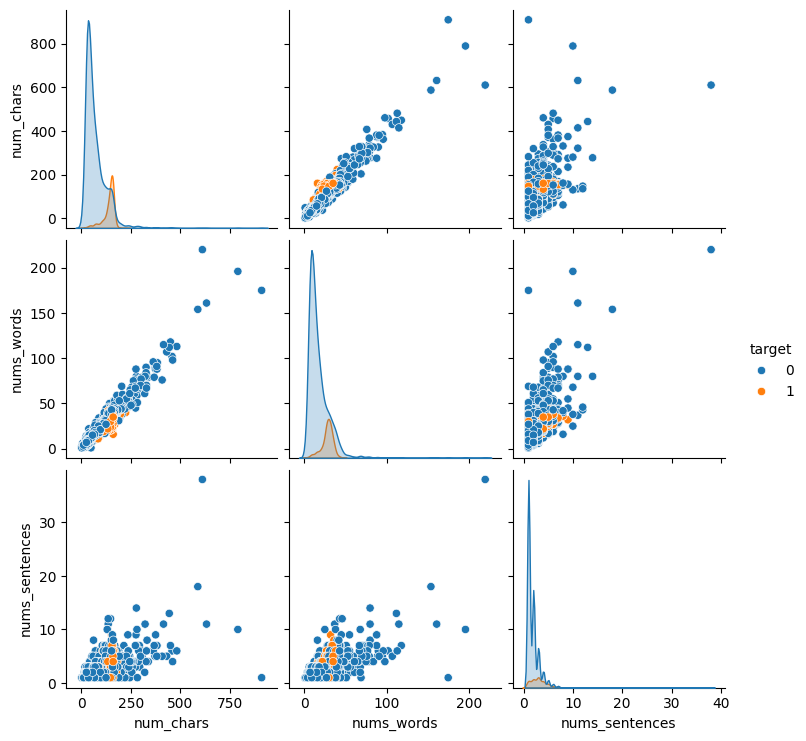

In [33]:
sns.pairplot(df,hue='target')

In [34]:
df

,target,text,num_chars,nums_words,nums_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
selected_columns = ['target', 'num_chars', 'nums_words', 'nums_sentences']  # Replace with your actual column names

# Select only the specified columns
selected_df = df[selected_columns]


In [36]:
selected_df.corr()

,target,num_chars,nums_words,nums_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
nums_words,0.262912,0.965760,1.000000,0.679971
nums_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

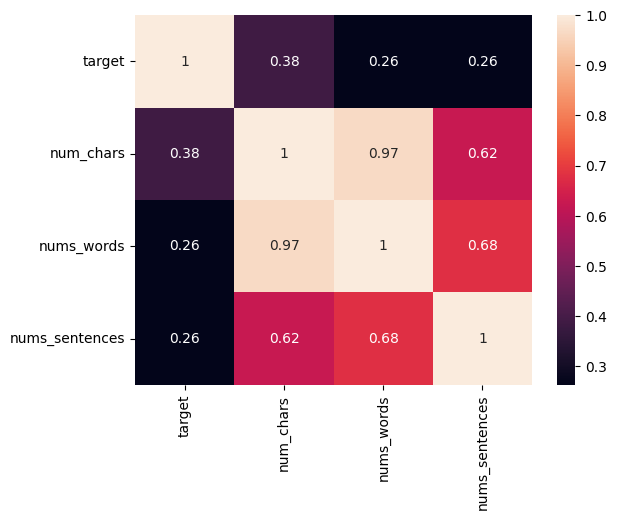

In [37]:
sns.heatmap(selected_df.corr(),annot=True)

## DATA PREPROCESSING

In [38]:
from nltk.stem.porter import PorterStemmer

In [39]:
ps = PorterStemmer()


In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
transform_text('Hi! , how and are now you? almi rah')

'hi almi rah'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_chars,nums_words,nums_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [48]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

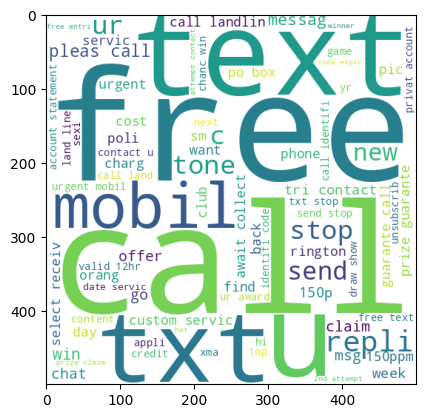

In [49]:
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

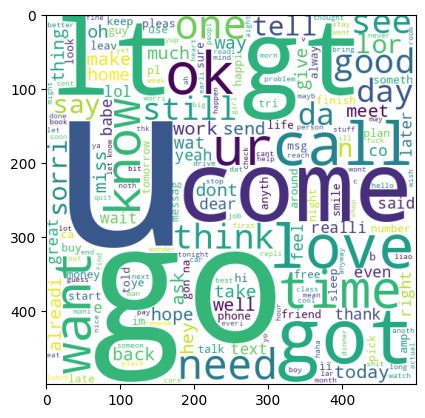

In [51]:
plt.imshow(ham_wc)

In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

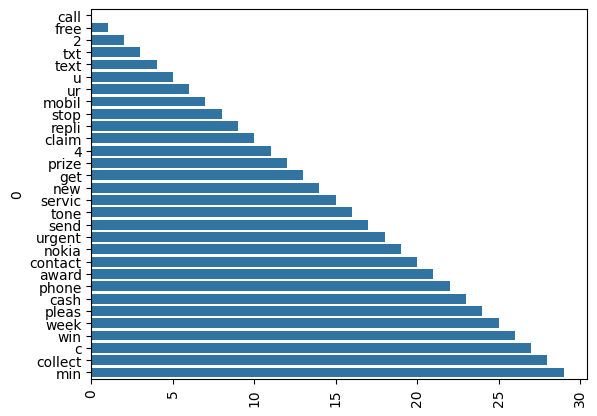

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()


,target,text,num_chars,nums_words,nums_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4 Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y = df['target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [70]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [72]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9264990328820116, 0.7421875)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [75]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.924565
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


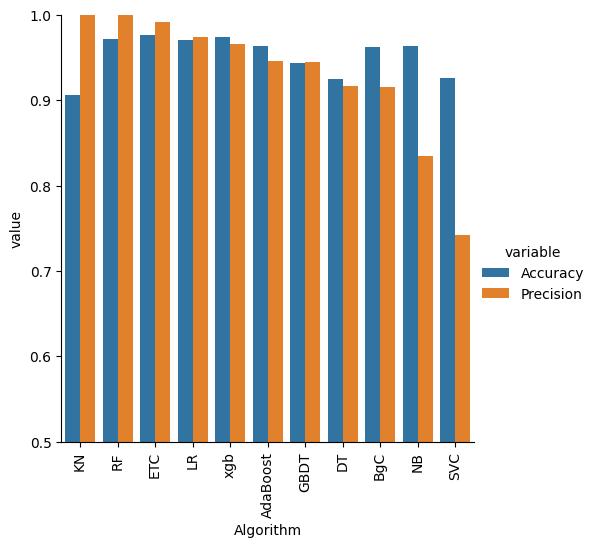

In [77]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [81]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [82]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [87]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [89]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier


In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [92]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9765625
